# DATS 6103
## Individual Project 1
### Izzy Illari G38518463

In [18]:
#import numpy
import numpy as np
#import pandas, which is a software library written for data manipulation and analysis.
import pandas as pd
print("The pandas version is", pd.__version__)
from  matplotlib import pyplot
#import seaborn
import seaborn as sns
#import the World Bank Data
import world_bank_data as wb
pd.set_option('display.max_rows', 6)
#import warnings
import warnings
#hide warnings
warnings.filterwarnings('ignore')
#import system
import sys

The pandas version is 0.24.2


# Part 1: Data Acquisition and Pre-processing

I am familiar with using R from a previous dats class, and would like to use dataframes in python. To do so I am going to use the pandas library. To get the military spending data I will get the information from the World Bank Data.

The World Bank has data that is accessible by a certain ID code. This code can be found in the url for the information, like in the following: https://data.worldbank.org/indicator/MS.MIL.XPND.GD.ZS

This above webpage has "Military expenditure (% of GPD)" for all countries, and the ID code is "MS.MIL.XPND.GD.ZS". I do not have to download the CSV files for each dataset that I want, but I can instead import it here using the world_bank_data package and pandas dataframes. I could also search the world bank in the following way:

In [19]:
wb.search_indicators('military expenditure')

,name,unit,source,sourceNote,sourceOrganization,topics
id,,,,,,
MS.MIL.XPND.CD,Military expenditure (current USD),,World Development Indicators,Military expenditures data from SIPRI are deri...,Stockholm International Peace Research Institu...,
MS.MIL.XPND.CN,Military expenditure (current LCU),,World Development Indicators,Military expenditures data from SIPRI are deri...,Stockholm International Peace Research Institu...,Public Sector
MS.MIL.XPND.GD.ZS,Military expenditure (% of GDP),,World Development Indicators,Military expenditures data from SIPRI are deri...,Stockholm International Peace Research Institu...,Public Sector
...,...,...,...,...,...,...
NE.CON.GOVT.KD.ZG,General government final consumption expenditu...,,World Development Indicators,Annual percentage growth of general government...,"World Bank national accounts data, and OECD Na...",Economy & Growth
NE.CON.GOVT.KN,General government final consumption expenditu...,,World Development Indicators,General government final consumption expenditu...,"World Bank national accounts data, and OECD Na...",Economy & Growth
NE.CON.GOVT.ZS,General government final consumption expenditu...,,World Development Indicators,General government final consumption expenditu...,"World Bank national accounts data, and OECD Na...",Economy & Growth


In the above output we see a search in the World Bank for military expenditures, where the ID code is in the far left and we have a summary of the data. This is the code I was discussing before, and will be getting from the urls instead of searching like this.

In [20]:
mil_xpnd_percentGDP = wb.get_series('MS.MIL.XPND.GD.ZS')
mil_xpnd_usd = wb.get_series('MS.MIL.XPND.CD')
gdp_usd = wb.get_series('NY.GDP.MKTP.CD')
gdp_growth_annualpercent = wb.get_series('NY.GDP.MKTP.KD.ZG')
gdp_percapita_growth_annualpercent = wb.get_series('NY.GDP.PCAP.KD.ZG')
population_tot = wb.get_series('SP.POP.TOTL')

All of the above has been imported as *series* but we want *dataframes*. I will need to convert them.

In [21]:
#column to drop
to_drop = ["Series"]
#military expenditure in % of GDP
df_mil_xpnd_percentGDP = mil_xpnd_percentGDP.to_frame('count').reset_index()
df_mil_xpnd_percentGDP = df_mil_xpnd_percentGDP.rename(columns={"count": "MIL.XPN.%GDP"})
df_mil_xpnd_percentGDP.drop(to_drop, inplace=True, axis=1)
#print(df_mil_xpnd_percentGDP)
#military expenditure in USD
df_mil_xpnd_usd = mil_xpnd_usd.to_frame('count').reset_index()
df_mil_xpnd_usd = df_mil_xpnd_usd.rename(columns={"count": "MIL.XPN.USD"})
df_mil_xpnd_usd.drop(to_drop, inplace=True, axis=1)
#print(df_mil_xpnd_usd)
#GDP in USD
df_gdp_usd = gdp_usd.to_frame('count').reset_index()
df_gdp_usd = df_gdp_usd.rename(columns={"count": "GDP.USD"})
df_gdp_usd.drop(to_drop, inplace=True, axis=1)
#print(df_gdp_usd)
#GDP growth in annual percent
df_gdp_growth_annualpercent = gdp_growth_annualpercent.to_frame('count').reset_index()
df_gdp_growth_annualpercent = df_gdp_growth_annualpercent.rename(columns={"count": "GDP.GROW.%ANNUAL"})
df_gdp_growth_annualpercent.drop(to_drop, inplace=True, axis=1)
#print(df_gdp_growth_annualpercent)
#GDP per capita growth in annual percent
df_gdp_percapita_growth_annualpercent = gdp_percapita_growth_annualpercent.to_frame('count').reset_index()
df_gdp_percapita_growth_annualpercent = df_gdp_percapita_growth_annualpercent.rename(columns={"count": "GDP.PERCAPITA.GROW.%ANNUAL"})
df_gdp_percapita_growth_annualpercent.drop(to_drop, inplace=True, axis=1)
#print(df_gdp_growth_annualpercent)
#total population
df_population_tot = population_tot.to_frame('count').reset_index()
df_population_tot = df_population_tot.rename(columns={"count": "POP.TOT"})
df_population_tot.drop(to_drop, inplace=True, axis=1)
print(df_population_tot)

          Country  Year     POP.TOT
0      Arab World  1960  92197753.0
1      Arab World  1961  94724510.0
2      Arab World  1962  97334442.0
...           ...   ...         ...
16101    Zimbabwe  2018  14439018.0
16102    Zimbabwe  2019  14645468.0
16103    Zimbabwe  2020         NaN

[16104 rows x 3 columns]


I only printed out the last dataframe above to see if it worked. It looks like it has.

Now that I've imported everything I want to clean up the data. All of the above have been imported from the WB Data in a dataframe. We can now filter this dataframe for the data we are interested in: 
1. at least five years of data no older than 2010
2. the following countries: US, China, Russia, Germany, UK, France, Italy, Saudi Arabia, S. Korea, Israel

I could create a function to clean up the dataframes, and then I could apply this function to all the dataframes, since I want the same conditions for all of them. At that point then I could combine them into a single dataframe where I have multiple columns for the information. 

In [22]:
def clean_dataframe(df_in):
    #change variables to the correct type so we can use them
    temp_df = df_in.astype({'Country': 'category', 'Year': 'int'})
    #search for the specific countries that we want using the WB country names
    temp_df = temp_df[temp_df['Country'].isin(['United States', 'China', 'Russian Federation', 'Germany', 'United Kingdom', 'France', 'Italy', 'Saudi Arabia', 'Korea, Rep.', 'Israel'])]
    #search for years that include and are greater than 2010
    condition_year = temp_df["Year"] >= 2010
    temp_df = temp_df[condition_year]
    return temp_df

Let's see if the function works!

In [23]:
#military expenditure in percent of GDP
df_mil_xpnd_percentGDP = clean_dataframe(df_mil_xpnd_percentGDP)
print(df_mil_xpnd_percentGDP)
print(type(df_mil_xpnd_percentGDP))

             Country  Year  MIL.XPN.%GDP
5418           China  2010      1.907437
5419           China  2011      1.834158
5420           China  2012      1.836452
...              ...   ...           ...
15491  United States  2018      3.316244
15492  United States  2019      3.413107
15493  United States  2020           NaN

[110 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>


The function *does* indeed work, and it returns a cleaned dataframe! This means I will use it to clean up my other dataframes.

In [24]:
#military expenditure in USD
df_mil_xpnd_usd = clean_dataframe(df_mil_xpnd_usd)
#print(df_mil_xpnd_usd)
#GDP in USD
df_gdp_usd = clean_dataframe(df_gdp_usd)
#print(df_gdp_usd)
#GDP growth in annual percent
df_gdp_growth_annualpercent = clean_dataframe(df_gdp_growth_annualpercent)
#print(df_gdp_growth_annualpercent)
#GDP per capita growth in annual percent
df_gdp_percapita_growth_annualpercent = clean_dataframe(df_gdp_percapita_growth_annualpercent)
#print(df_gdp_percapita_growth_annualpercent)
#total population
df_population_tot = clean_dataframe(df_population_tot)
#print(df_population_tot)

Now I'm going to create my final dataframe from which I will make my plots. This will have all the data as columns.

In [25]:
df_total_data = df_mil_xpnd_percentGDP
df_total_data["MIL.XPN.USD"] = df_mil_xpnd_usd["MIL.XPN.USD"]
df_total_data["GDP.USD"] = df_gdp_usd["GDP.USD"]
df_total_data["GDP.GROW.%ANNUAL"] = df_gdp_growth_annualpercent["GDP.GROW.%ANNUAL"]
df_total_data["GDP.PERCAPITA.GROW.%ANNUAL"] = df_gdp_percapita_growth_annualpercent["GDP.PERCAPITA.GROW.%ANNUAL"]
df_total_data["POP.TOT"] = df_population_tot["POP.TOT"]
print(df_total_data)

             Country  Year  MIL.XPN.%GDP   MIL.XPN.USD       GDP.USD  \
5418           China  2010      1.907437  1.157118e+11  6.087165e+12   
5419           China  2011      1.834158  1.379673e+11  7.551500e+12   
5420           China  2012      1.836452  1.573904e+11  8.532231e+12   
...              ...   ...           ...           ...           ...   
15491  United States  2018      3.316244  6.824914e+11  2.052905e+13   
15492  United States  2019      3.413107  7.317514e+11  2.137442e+13   
15493  United States  2020           NaN           NaN           NaN   

       GDP.GROW.%ANNUAL  GDP.PERCAPITA.GROW.%ANNUAL       POP.TOT  
5418          10.636140                   10.103101  1.337705e+09  
5419           9.550914                    9.027256  1.344130e+09  
5420           7.859627                    7.335380  1.350695e+09  
...                 ...                         ...           ...  
15491          2.927323                    2.391097  3.266875e+08  
15492          

Now I want to remove the NaN values.

In [26]:
#clean the NaN values 
df_total_data_noNaN = df_total_data.dropna()
print(df_total_data_noNaN)

             Country  Year  MIL.XPN.%GDP   MIL.XPN.USD       GDP.USD  \
5418           China  2010      1.907437  1.157118e+11  6.087165e+12   
5419           China  2011      1.834158  1.379673e+11  7.551500e+12   
5420           China  2012      1.836452  1.573904e+11  8.532231e+12   
...              ...   ...           ...           ...           ...   
15490  United States  2017      3.313385  6.467529e+11  1.948539e+13   
15491  United States  2018      3.316244  6.824914e+11  2.052905e+13   
15492  United States  2019      3.413107  7.317514e+11  2.137442e+13   

       GDP.GROW.%ANNUAL  GDP.PERCAPITA.GROW.%ANNUAL       POP.TOT  
5418          10.636140                   10.103101  1.337705e+09  
5419           9.550914                    9.027256  1.344130e+09  
5420           7.859627                    7.335380  1.350695e+09  
...                 ...                         ...           ...  
15490          2.217010                    1.574044  3.249855e+08  
15491          

# Part 2: Data Analysis

## Compare the military data to that country’s GDP
In order to do this I will plot (military expenditure in USD, GDP in USD) for all the countries for each year. I need to check what years I have, because I removed all NaN values. I will be using ggplot to plot due to my familiarity with the package in R. 

In [27]:
print(df_total_data_noNaN.Year.unique()) #unique values in the year data
print(df_total_data_noNaN.Country.unique()) #unique values in the country data
print(df_total_data_noNaN) #check to see what dataframe looks like

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
[China, France, Germany, Israel, Italy, Korea, Rep., Russian Federation, Saudi Arabia, United Kingdom, United States]
Categories (10, object): [China, France, Germany, Israel, ..., Russian Federation, Saudi Arabia, United Kingdom, United States]
             Country  Year  MIL.XPN.%GDP   MIL.XPN.USD       GDP.USD  \
5418           China  2010      1.907437  1.157118e+11  6.087165e+12   
5419           China  2011      1.834158  1.379673e+11  7.551500e+12   
5420           China  2012      1.836452  1.573904e+11  8.532231e+12   
...              ...   ...           ...           ...           ...   
15490  United States  2017      3.313385  6.467529e+11  1.948539e+13   
15491  United States  2018      3.316244  6.824914e+11  2.052905e+13   
15492  United States  2019      3.413107  7.317514e+11  2.137442e+13   

       GDP.GROW.%ANNUAL  GDP.PERCAPITA.GROW.%ANNUAL       POP.TOT  
5418          10.636140                   10.103101  1.33

In [28]:
# create lists of the years and countries
tuple_years = (2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019)
tuple_countries = ("China", "France", "Germany", "Israel", "Italy", "Korea, Rep.", "Russian Federation", "Saudi Arabia", "United Kingdom", "United States")
# clear up the dataframe left columns
df_total_data_noNaN.reset_index(inplace=True)
df_total_data_noNaN.drop("index",axis=1,inplace=True)

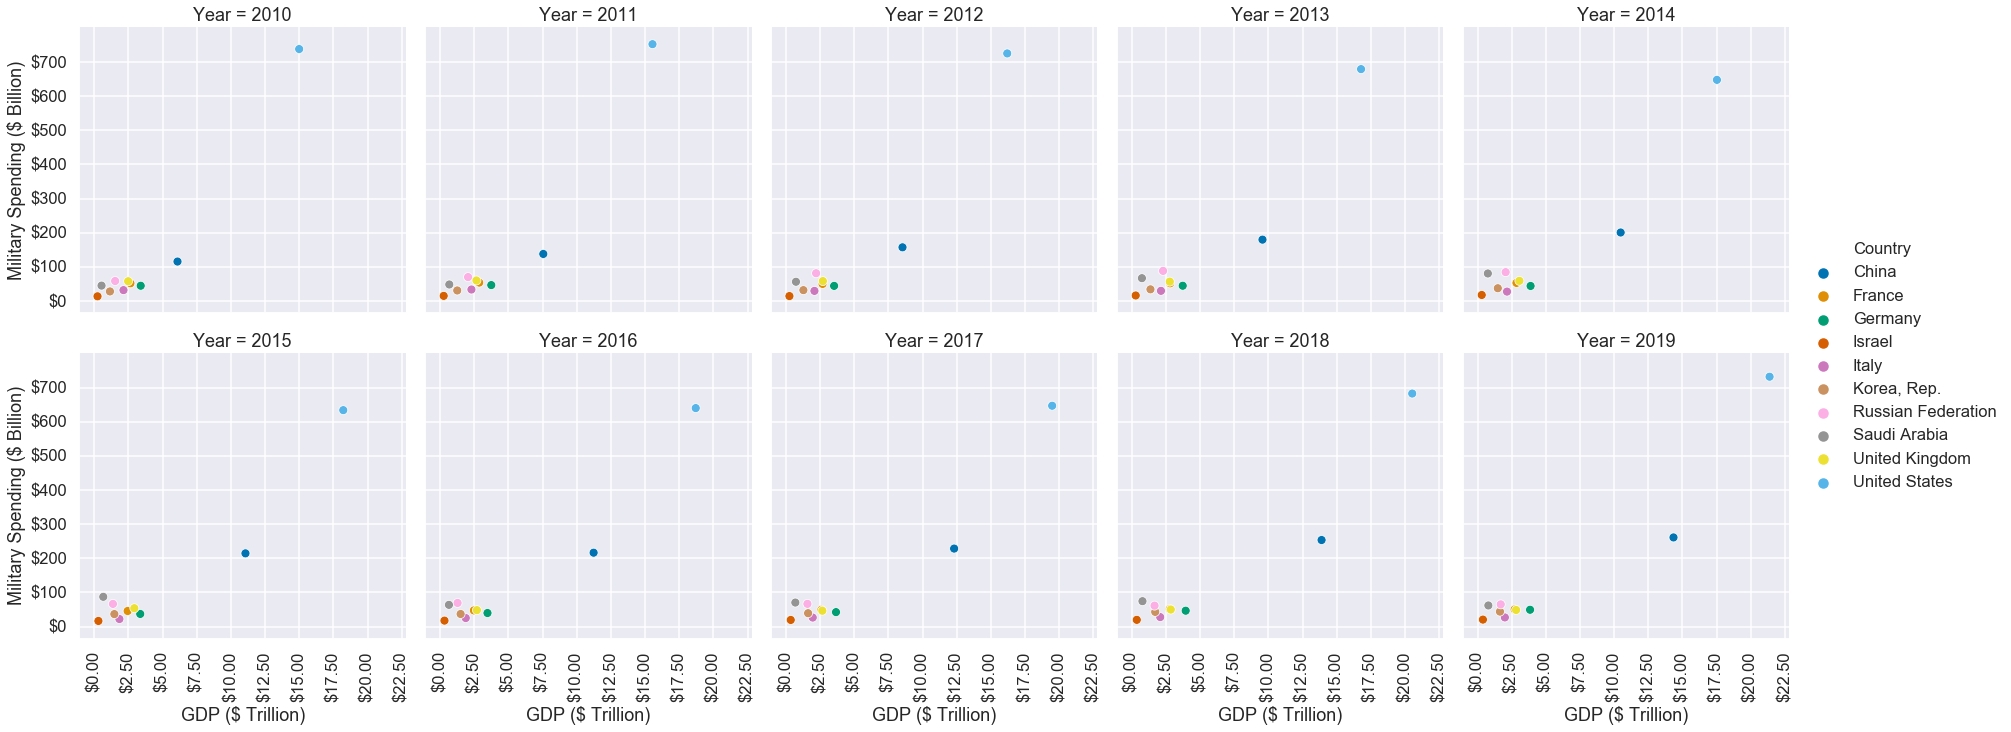

In [29]:
# Create a visualization
sns.set()
sns.set_context("talk", font_scale = 1) 
with sns.axes_style("darkgrid"):
    plot1 = sns.relplot(
        data = df_total_data_noNaN,          # data frame
        x = "GDP.USD",                       # x data 
        y = "MIL.XPN.USD",                   # y data
        col = "Year",                        # separate plots for each year
        col_wrap = 5,                        # 5 columns
        hue = "Country",                     # color by country
        hue_order = tuple_countries,         # order by pre-set tuple of countires 
        palette = "colorblind"               # color palette for color blind
)
    # change x and y labels
    plot1.set(
        xlabel = "GDP ($ Trillion)", 
        ylabel = "Military Spending ($ Billion)"
    )
    
    # yaxis in billions of dollars
    ytic = list(range(0,800000000000,100000000000))
    ylab = ["${:,.0f}".format(i/1e9) for i in ytic]
    
    # xaxis in trillions of dollars
    xtic = list(range(0,23000000000000,2500000000000))
    xlab = ["${:,.2f}".format(i/1e12) for i in xtic]
    
    # apply tick mark changes
    plot1.set(
        xticks = xtic,
        xticklabels = xlab,
        yticks = ytic,
        yticklabels = ylab)
    
    # iterate over the individual axes objects and call set_xticklabels()
    for axes in plot1.axes.flat:
        axes.set_xticklabels(
            axes.get_xticklabels(), 
            rotation = 90,                     # rotate tick marks by 90 deg 
            #horizontalalignment='right'
        )
pyplot.show()

From the above plots for the Military spending (USD) vs the country's GPD (USD) for years 2010-2019 we see that all the countries except for China and the United States are clumped together at the bottom left. As we get closer to modern day, China's GDP increases, as does its military spending. The USA is the country furthest to the top right of the plot, with both the highest Military spending and GDP of all the countir

## Compare the overall military spending of the all 10 countries in absolute and percentages

We can examine the military spending of all 10 countries in absolute and in percentages via bar charts. From the data that we have taken from the World Bank, we have the Military expenditure in terms of USD, and also Military expenditure as a % of the country's GDP. We will plot these side-by-side for comparison's sake.

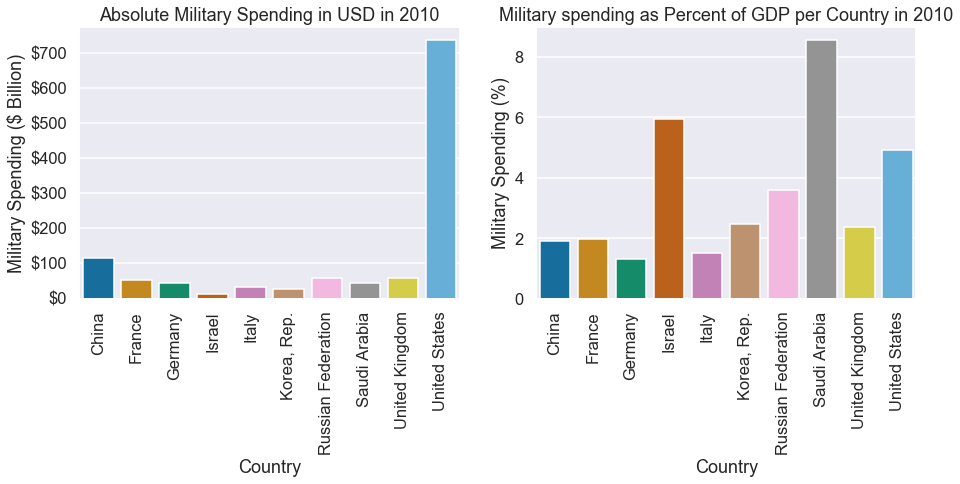

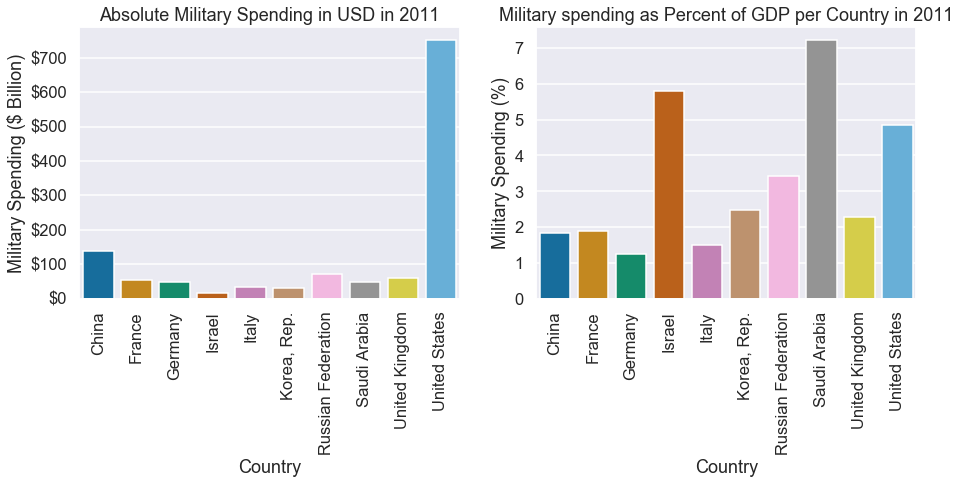

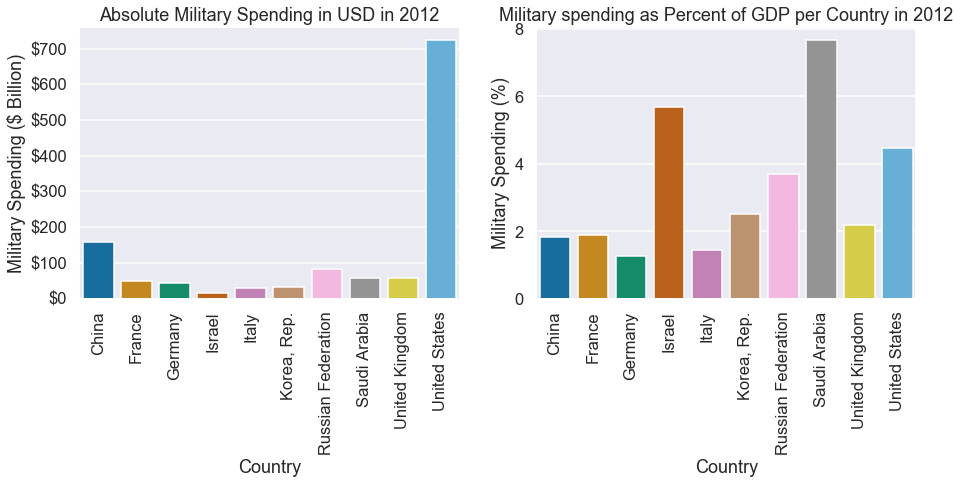

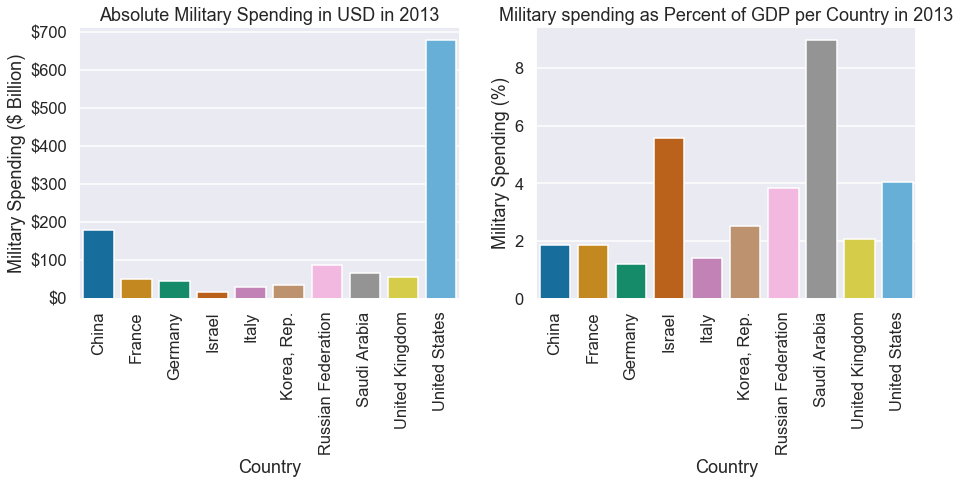

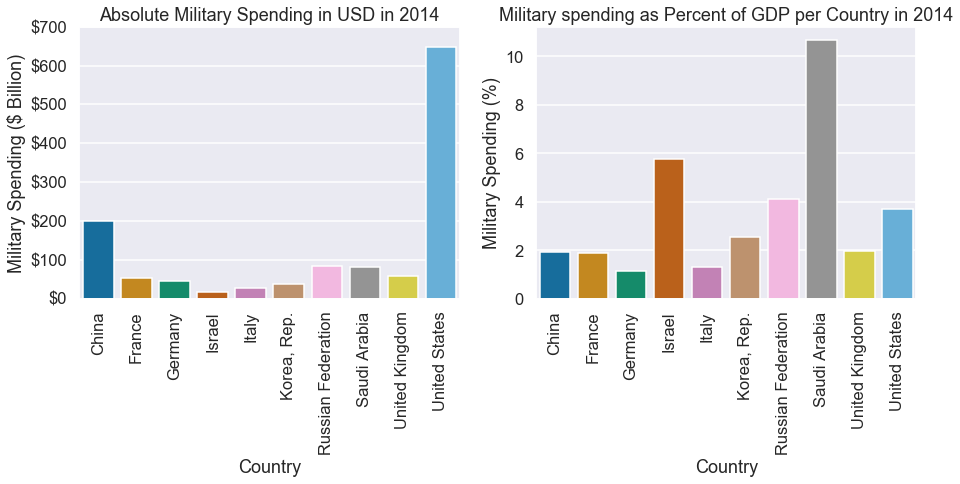

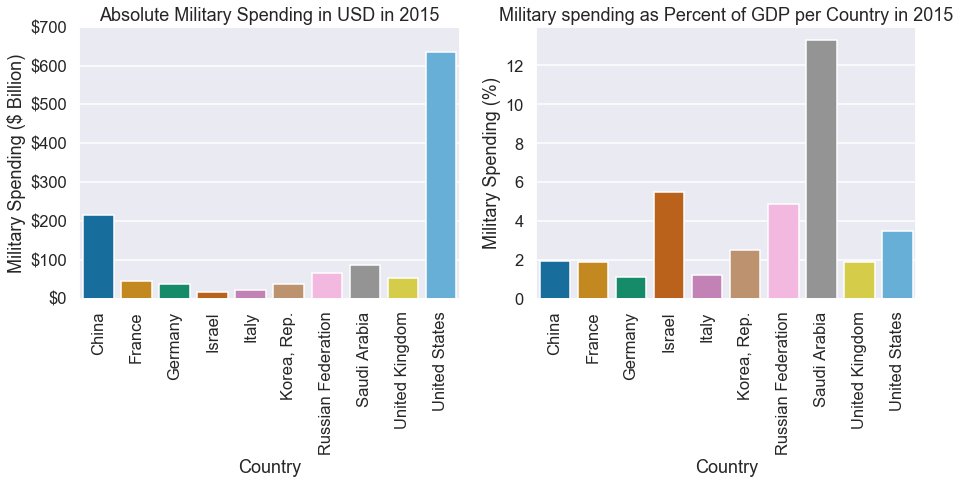

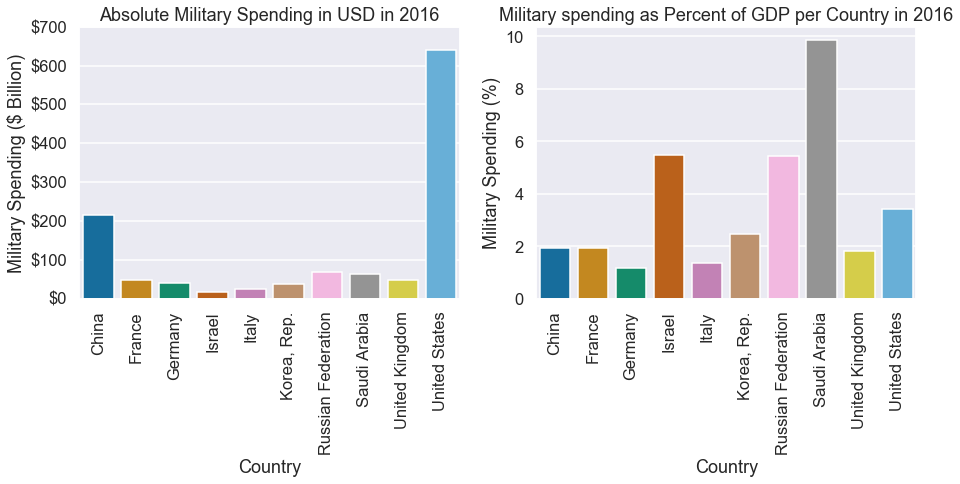

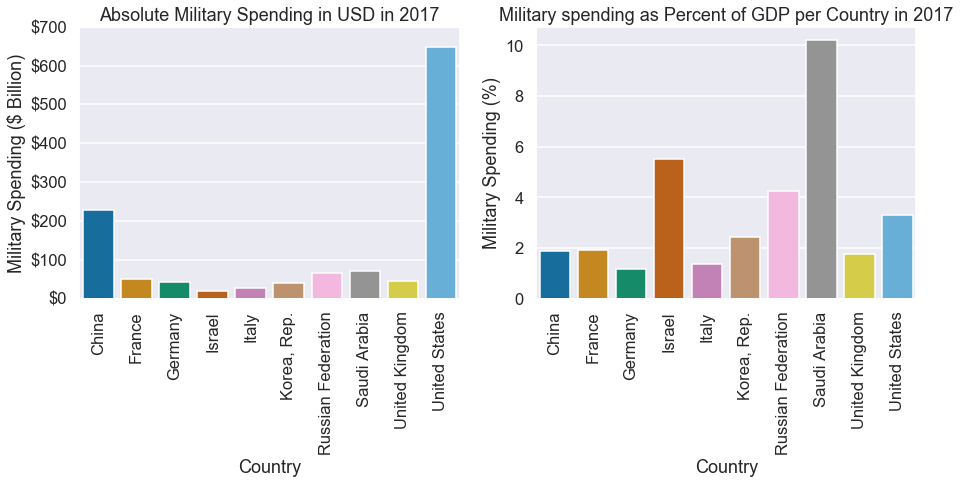

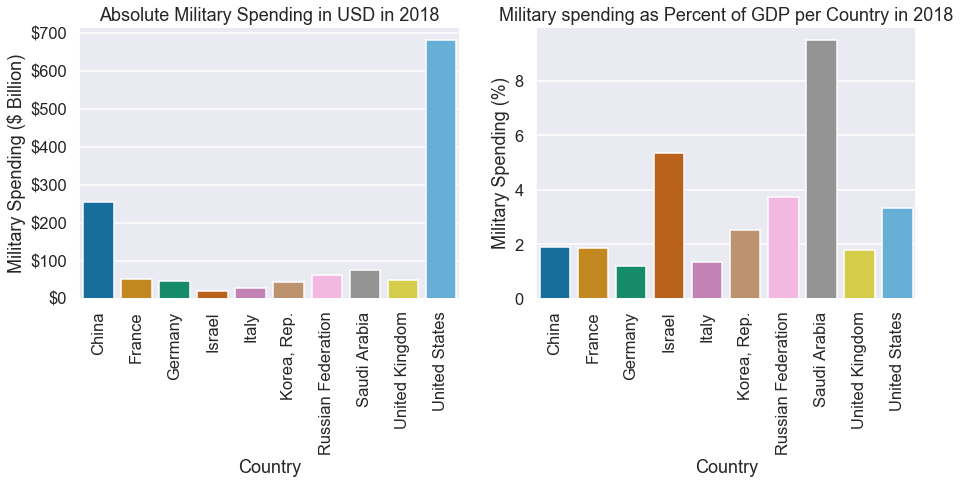

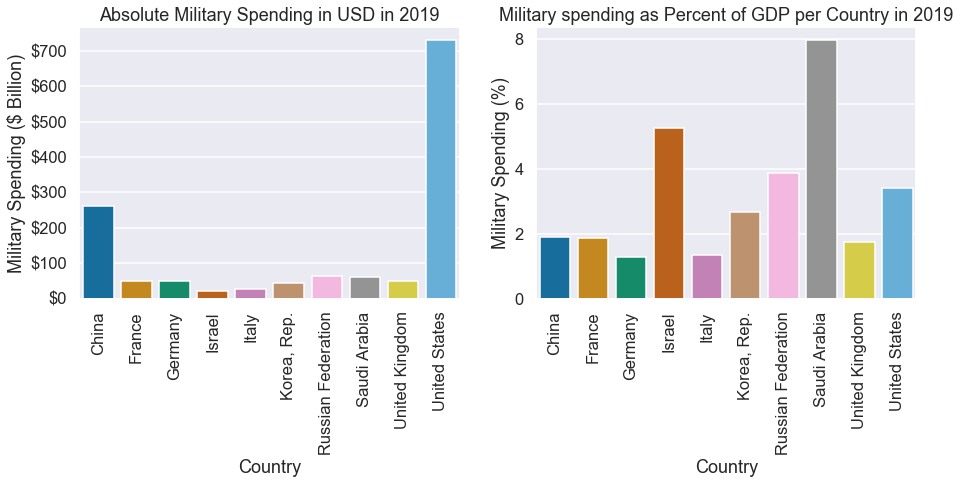

In [30]:
#since I cannot exploit replot like I did before I need to make a for loop to loop through all the possible years
for y in tuple_years:
    # create temporary dataframe using only the specified year as a filter
    df_temp = df_total_data_noNaN.loc[df_total_data_noNaN["Year"] == y]
    # fix issues with index
    df_temp.reset_index(inplace=False)
    
    # plot side by side
    fig, ax = pyplot.subplots(1,2, sharey = False, figsize=(15,5))
    
    # create a barplot of absolute military spending
    plot_abs = sns.barplot(
        data = df_temp,
        y =  "MIL.XPN.USD",
        x = "Country",  
        palette = "colorblind", 
        #hue = "Country",
        #hue_order = tuple_countries,
        #hue_order = df_temp.sort_values("MIL.XPN.USD", ascending = False).Country,
        #order = df_temp.sort_values("MIL.XPN.USD", ascending = False).Country,
        order = tuple_countries,
        ax = ax[0]
    )
    
    # create a barplot of military spending in percentages
    plot_per = sns.barplot(
        data = df_temp,
        y =  "MIL.XPN.%GDP",
        x = "Country",  
        palette = "colorblind",
        #hue = "Country",
        #hue_order = tuple_countries,
        #hue_order = df_temp.sort_values("MIL.XPN.USD", ascending = False).Country,
        #order = df_temp.sort_values("MIL.XPN.%GDP", ascending = False).Country,
        order = tuple_countries,
        ax = ax[1]
    )
    
    # set plot labels
    plot_abs.set(
        title = "Absolute Military Spending in USD in " + str(y),
        ylabel = "Military Spending ($ Billion)", 
        xlabel = "Country"
    )
    plot_per.set(
        title = "Military spending as Percent of GDP per Country in " + str(y),
        ylabel = "Military Spending (%)", 
        xlabel = "Country"
    )
    
    # y axis in billions of dollars
    ytic_abs = list(range(0,800000000000,100000000000))
    ylab_abs = ["${:,.0f}".format(i/1e9) for i in ytic_abs]
    
    # apply tick mark changes
    plot_abs.set(
        yticks = ytic_abs,
        yticklabels = ylab_abs
    )
    
    # rotate the x axis tick marks
    plot_abs.axes.set_xticklabels(
            plot_abs.axes.get_xticklabels(), 
            rotation = 90
        )
    plot_per.axes.set_xticklabels(
            plot_per.axes.get_xticklabels(), 
            rotation = 90
        )
    
    # show the plot
    pyplot.show()

If we look at the absolute military spending, the USA is always in first with the most at about seven hundred billion us dollars every year, followed by China in second place with around two to three hundred billion us dollars. However, if we compare the military spending in terms of a percentage of that country's GDP, we get a different story. From the previous Military spending (USD) vs GDP (USD) plots we saw that the USA was to the far upper right corner, meaning the USA also has a large GDP in addition to a large military budget, as opposed to the other countries. This means we can expect, proportionally, that the military spending of the USA in terms of a percent of the GDP might be smaller than other countries, which have comparatively smaller GDPs. This assumption is confirmed by these plots. When we look at the military spending as a percent of GDP we see that countries like Saudi Arabi and Israel are spending as high as 13% their GDP (Saudi Arabia in 2015) on their military. Israel tends to spend around 5% of their GDP on military. Russia also tends to spend more than the USA.   

## Compare the per person military spending to the per person GDP in absolute and percentages

Now we need the population of each country, and we will need to divide the military spending and GDP by the population. Our dataframe happens to have several columns of data, including the Military expenditure as a % of the GDP, the Military expenditure in USD, the GDP in USD, The GDP annual growth in %, the GDP per capita annual growth in %, and, finally, the total population. We can see this in the below output.

In [31]:
df_total_data_noNaN.head()

,Country,Year,MIL.XPN.%GDP,MIL.XPN.USD,GDP.USD,GDP.GROW.%ANNUAL,GDP.PERCAPITA.GROW.%ANNUAL,POP.TOT
0,China,2010,1.907437,1.157118e+11,6.087165e+12,10.636140,10.103101,1.337705e+09
1,China,2011,1.834158,1.379673e+11,7.551500e+12,9.550914,9.027256,1.344130e+09
2,China,2012,1.836452,1.573904e+11,8.532231e+12,7.859627,7.335380,1.350695e+09
3,China,2013,1.866944,1.798805e+11,9.570406e+12,7.768615,7.237863,1.357380e+09
4,China,2014,1.905848,2.007722e+11,1.047568e+13,7.424524,6.881995,1.364270e+09


By dividing the the Military expenditure as a % of the GDP, the Military expenditure in USD, and the GDP in USD by the total population we will get the data we desire. We will include these new columns in our dataframe.

In [32]:
# make a new dataframe containing all the old data
df_div_pop = df_total_data_noNaN
# divide absolute military spending by population
df_div_pop["MXPN_ABS_POP"] = df_total_data_noNaN["MIL.XPN.USD"]/df_total_data_noNaN["POP.TOT"]
# divide gdp by population
df_div_pop["GDP_POP"] = df_total_data_noNaN["GDP.USD"]/df_total_data_noNaN["POP.TOT"]
# divide relative military spending by population
df_div_pop["MXPN_PERC_POP"] = (df_div_pop["MXPN_ABS_POP"]/df_div_pop["GDP_POP"]) * 100
# look at new dataframe
df_div_pop.head()

,Country,Year,MIL.XPN.%GDP,MIL.XPN.USD,GDP.USD,GDP.GROW.%ANNUAL,GDP.PERCAPITA.GROW.%ANNUAL,POP.TOT,MXPN_ABS_POP,GDP_POP,MXPN_PERC_POP
0,China,2010,1.907437,1.157118e+11,6.087165e+12,10.636140,10.103101,1.337705e+09,86.500223,4550.453596,1.900914
1,China,2011,1.834158,1.379673e+11,7.551500e+12,9.550914,9.027256,1.344130e+09,102.644316,5618.132491,1.827018
2,China,2012,1.836452,1.573904e+11,8.532231e+12,7.859627,7.335380,1.350695e+09,116.525476,6316.918863,1.844657
3,China,2013,1.866944,1.798805e+11,9.570406e+12,7.768615,7.237863,1.357380e+09,132.520334,7050.645920,1.879549
4,China,2014,1.905848,2.007722e+11,1.047568e+13,7.424524,6.881995,1.364270e+09,147.164567,7678.599432,1.916555


First we will look at the Military expenditure in USD per person vs the GDP in USD per person for each year.

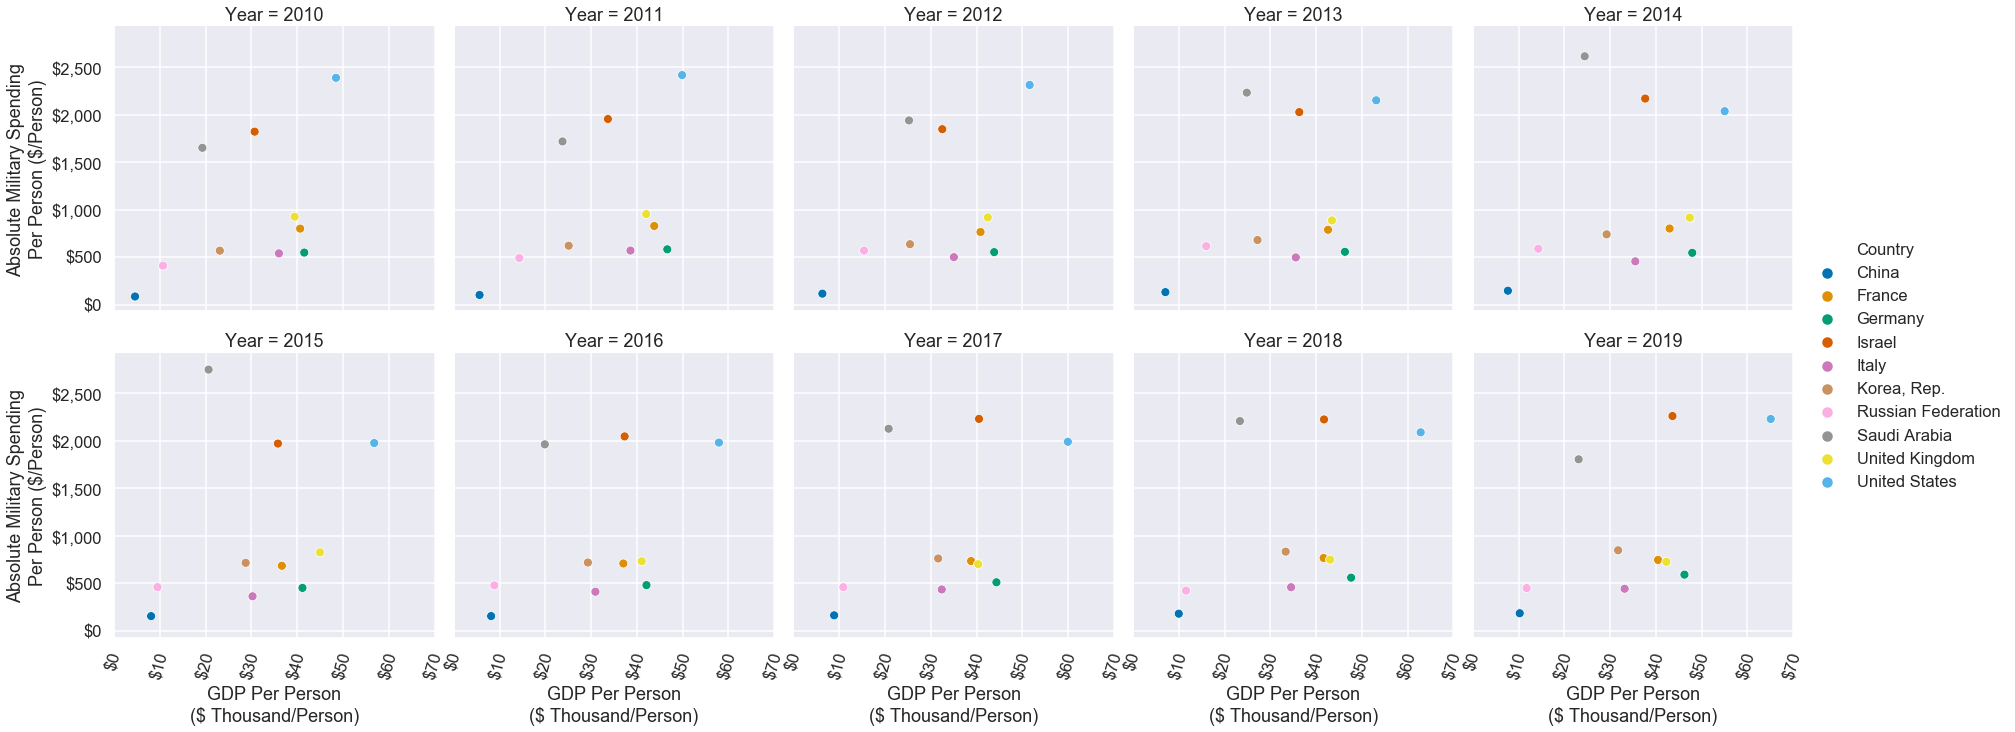

In [40]:
sns.set()
sns.set_context("talk", font_scale = 1) 
with sns.axes_style("darkgrid"):
    plot1 = sns.relplot(
        data = df_div_pop,          # data frame
        x = "GDP_POP",                       # x data 
        y = "MXPN_ABS_POP",                   # y data
        col = "Year",                        # separate plots for each year
        col_wrap = 5,                        # 5 columns
        hue = "Country",                     # color by country
        hue_order = tuple_countries,         # order by pre-set tuple of countires 
        palette = "colorblind"               # color palette for color blind
)
    # change x and y labels
    plot1.set(
        xlabel = "GDP Per Person\n($ Thousand/Person)", 
        ylabel = "Absolute Military Spending\nPer Person ($/Person)"
    )
    
    # y axis in billions of dollars
    ytic_abs = list(range(0,3000,500))
    ylab_abs = ["${:,.0f}".format(i) for i in ytic_abs]
    
    # x axis in billions of dollars
    xtic_abs = list(range(0,80000,10000))
    xlab_abs = ["${:,.0f}".format(i/1e3) for i in xtic_abs]
    
    # apply tick mark changes
    plot1.set(
        xticks = xtic_abs,
        xticklabels = xlab_abs,
        yticks = ytic_abs,
        yticklabels = ylab_abs
    )
    
    # iterate over the individual axes objects and call set_xticklabels()
    for axes in plot1.axes.flat:
        axes.set_xticklabels(
            axes.get_xticklabels(), 
            rotation = 75,                     # rotate tick marks by 75 deg 
            #horizontalalignment='right'
        )
pyplot.show()

In the above plots we can see the 3 contenders for highest military spending per person: Saudi Arabia, Israel, and the US. Saudi Arabia and Israel both have smaller GDP per person than the US, but for majority of the years that we are looking at, they have military spending per person that is equal to or more than the US.

Now let's look at the military spending as a percentage of the GDP (relative military spending) per person vs the GDP per person.

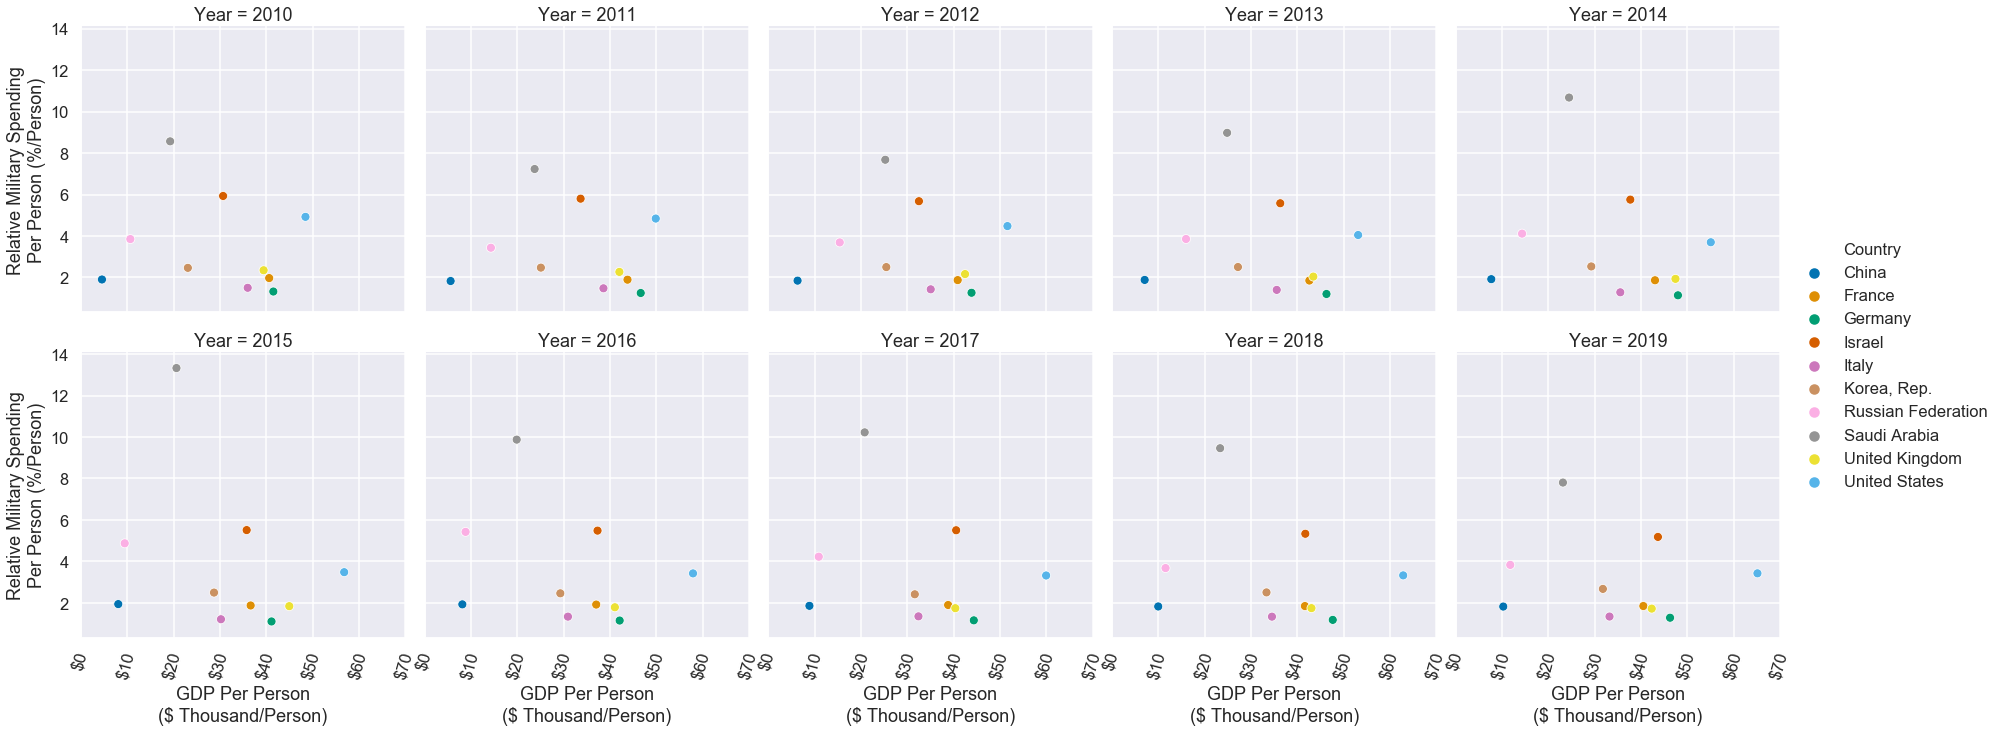

In [34]:
sns.set()
sns.set_context("talk", font_scale = 1) 
with sns.axes_style("darkgrid"):
    plot1 = sns.relplot(
        data = df_div_pop,          # data frame
        x = "GDP_POP",                       # x data 
        y = "MXPN_PERC_POP",                   # y data
        col = "Year",                        # separate plots for each year
        col_wrap = 5,                        # 5 columns
        hue = "Country",                     # color by country
        hue_order = tuple_countries,         # order by pre-set tuple of countires 
        palette = "colorblind"               # color palette for color blind
)
    # change x and y labels
    plot1.set(
        xlabel = "GDP Per Person\n($ Thousand/Person)", 
        ylabel = "Relative Military Spending\nPer Person (%/Person)"
    )
    
    # x axis in billions of dollars
    xtic_abs = list(range(0,80000,10000))
    xlab_abs = ["${:,.0f}".format(i/1e3) for i in xtic_abs]
    
    # apply tick mark changes
    plot1.set(
        xticks = xtic_abs,
        xticklabels = xlab_abs
    )
    
    # iterate over the individual axes objects and call set_xticklabels()
    for axes in plot1.axes.flat:
        axes.set_xticklabels(
            axes.get_xticklabels(), 
            rotation = 75,                     # rotate tick marks by 75 deg 
            #horizontalalignment='right'
        )
    
pyplot.show()

Similar to the previous plots we see that Saudi Arabia has the highest Relative Military Spending Per Person for every year that we look at. Over the years we see that Israel, Russia, and the USA all hover around 2, 3, and 4 for the higest military spending per person, with usually Israel being firmly in 2nd. This shows us that Saudi Arabia and Israel are bigger spenders on their militaries proportionally when compared to their GDP. The USA spends the most in terms of money, but when we look at that value proportionally to the GDP of the US, we see a slightly different story.

## Fastest Growing Countries (absolute and relative)

We can look at the growth of these countries over the years, but we will sometimes need to look at this growth on a log scale, especially when we are comparing absolute military spending. We will examine the absolute and relative military spending, as well as the GDP growth in annual % and the GDP per capita growth in annual % for each country over the years. 

In [35]:
# take the log of the military spending
df_div_pop["LOG.ABS.MIL"] = np.log(df_div_pop["MIL.XPN.USD"])
df_div_pop["LOG.REL.MIL"] = np.log(df_div_pop["MIL.XPN.%GDP"])
df_div_pop.head()

,Country,Year,MIL.XPN.%GDP,MIL.XPN.USD,GDP.USD,GDP.GROW.%ANNUAL,GDP.PERCAPITA.GROW.%ANNUAL,POP.TOT,MXPN_ABS_POP,GDP_POP,MXPN_PERC_POP,LOG.ABS.MIL,LOG.REL.MIL
0,China,2010,1.907437,1.157118e+11,6.087165e+12,10.636140,10.103101,1.337705e+09,86.500223,4550.453596,1.900914,25.474368,0.645760
1,China,2011,1.834158,1.379673e+11,7.551500e+12,9.550914,9.027256,1.344130e+09,102.644316,5618.132491,1.827018,25.650283,0.606586
2,China,2012,1.836452,1.573904e+11,8.532231e+12,7.859627,7.335380,1.350695e+09,116.525476,6316.918863,1.844657,25.781995,0.607835
3,China,2013,1.866944,1.798805e+11,9.570406e+12,7.768615,7.237863,1.357380e+09,132.520334,7050.645920,1.879549,25.915558,0.624303
4,China,2014,1.905848,2.007722e+11,1.047568e+13,7.424524,6.881995,1.364270e+09,147.164567,7678.599432,1.916555,26.025437,0.644927


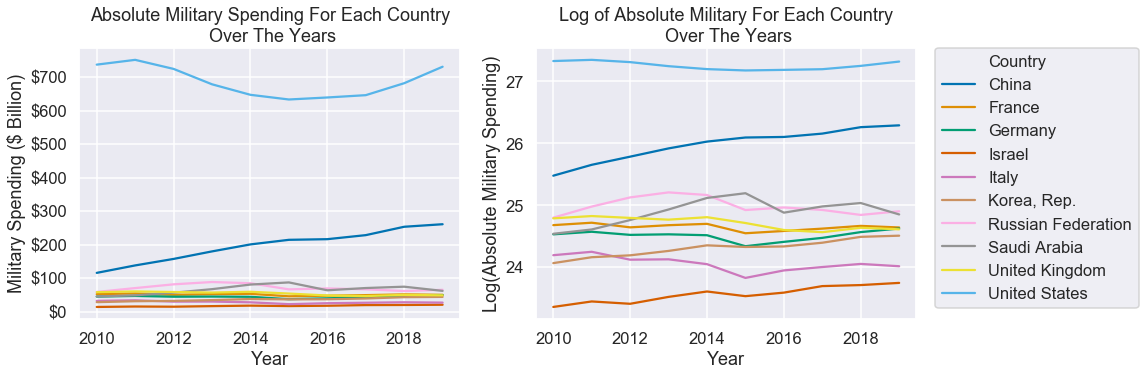

In [36]:
# plot side by side
fig, ax = pyplot.subplots(1,2, sharey = False, figsize=(15,5))
    
sns.set()
sns.set_context("talk", font_scale = 1) 
with sns.axes_style("darkgrid"):
    plot_LogAbsMil = sns.lineplot(
        data = df_div_pop, 
        x = "Year", 
        y = "LOG.ABS.MIL",
        hue = "Country",                    
        hue_order = tuple_countries,          
        palette = "colorblind",
        ax = ax[1]
    )
    plot_AbsMil = sns.lineplot(
        data = df_div_pop, 
        x = "Year", 
        y = "MIL.XPN.USD",
        hue = "Country",                    
        hue_order = tuple_countries,          
        palette = "colorblind",
        ax = ax[0]
    )
    # remove legend of the plot on the left
    plot_AbsMil.legend_.remove()
    
    # set plot labels
    plot_LogAbsMil.set(
        title = "Log of Absolute Military For Each Country\n Over The Years",
        ylabel = "Log(Absolute Military Spending)", 
        xlabel = "Year"
    )
    plot_AbsMil.set(
        title = "Absolute Military Spending For Each Country\n Over The Years",
        ylabel = "Military Spending ($ Billion)", 
        xlabel = "Year"
    )
    
    # y axis in billions of dollars
    ytic_AbsMil = list(range(0,800000000000,100000000000))
    ylab_AbsMil = ["${:,.0f}".format(i/1e9) for i in ytic_AbsMil]
    
    # apply tick mark changes
    plot_AbsMil.set(
        yticks = ytic_AbsMil,
        yticklabels = ylab_AbsMil
    )
    
pyplot.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
pyplot.show()

We can see the absolute military spending for each country over the years on the left, and the log of this spending on the right. A log plot allows us to see magnitudes of difference between values, which is helpful because with the absolute military spending the USA spends vastly more money on the military than any other country. The log plot allows us to see more clearly the trends between the countries that are bunched together at the bottom of the plot. 

We see that the USA has a decrease in spending during the end of Obama's first term and throughout Obama's second term in office, but then a spike in military spending during Trump's first term. China, in contrast, experiences pretty consistent growth in terms of military spending, which an upwards trend. Russia and Saudi Arabia experience some growth in military spending for the first half of the 2010s, but then negative spending in the second half.  

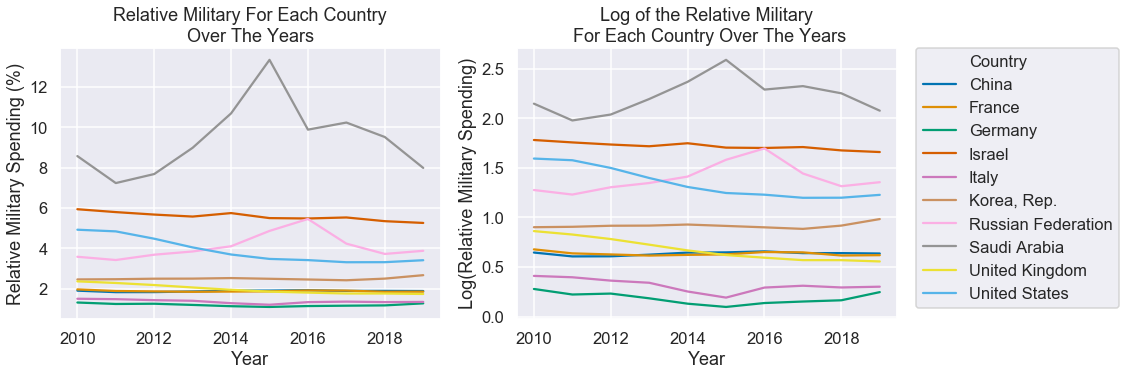

In [37]:
# plot side by side
fig, ax = pyplot.subplots(1,2, sharey = False, figsize=(15,5))

sns.set()
sns.set_context("talk", font_scale = 1) 
with sns.axes_style("darkgrid"):
    plot_RelMil = sns.lineplot(
        data = df_div_pop, 
        x = "Year", 
        y = "MIL.XPN.%GDP",
        hue = "Country",                    
        hue_order = tuple_countries,          
        palette = "colorblind",
        ax = ax[0]
    )
    plot_RelMil.legend_.remove()
    plot_LogRelMil = sns.lineplot(
        data = df_div_pop, 
        x = "Year", 
        y = "LOG.REL.MIL",
        hue = "Country",                    
        hue_order = tuple_countries,          
        palette = "colorblind",
        ax = ax[1]
    )
    
    # set plot labels
    plot_RelMil.set(
        title = "Relative Military For Each Country\nOver The Years",
        ylabel = "Relative Military Spending (%)", 
        xlabel = "Year"
    )
    plot_LogRelMil.set(
        title = "Log of the Relative Military\n For Each Country Over The Years",
        ylabel = "Log(Relative Military Spending)", 
        xlabel = "Year"
    )
    
pyplot.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
pyplot.show()

The log plot for the relative military spending is not as illuminating as it was for the absolute military spending. It, once again, helps us to see the behavior of the countries that are cluster near the bottom of the plot, but the growth is mostly flat. What we do see is that in ~2015 Saudi Arabia had an incredible spike in the relative military spending, and then scaled back. We see that Russia also had this spike, and that the USA has had decreasing relative military spending. Israel has consistently no growth in relative military spending. 

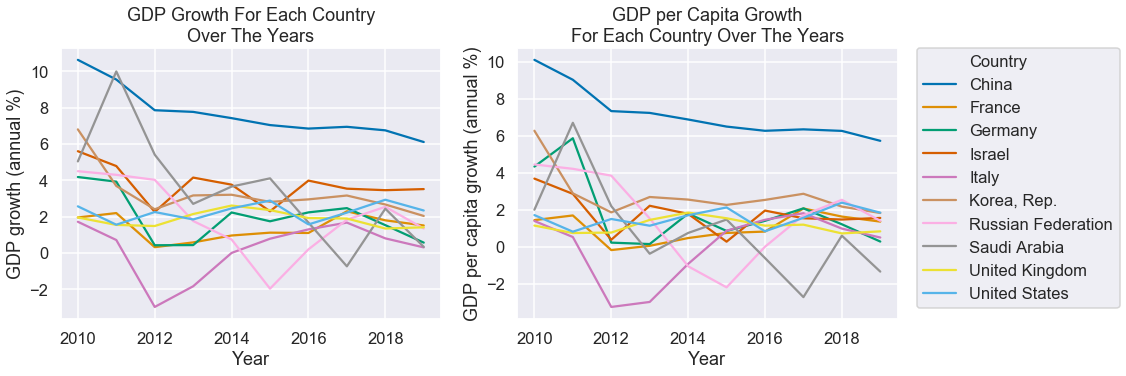

In [38]:
# plot side by side
fig, ax = pyplot.subplots(1,2, sharey = False, figsize=(15,5))

sns.set()
sns.set_context("talk", font_scale = 1) 
with sns.axes_style("darkgrid"):
    plot_GrowGDP = sns.lineplot(
        data = df_div_pop, 
        x = "Year", 
        y = "GDP.GROW.%ANNUAL",
        hue = "Country",                    
        hue_order = tuple_countries,          
        palette = "colorblind",
        ax = ax[0]
    )
    plot_GrowGDP.legend_.remove()
    plot_GrowPcGDP = sns.lineplot(
        data = df_div_pop, 
        x = "Year", 
        y = "GDP.PERCAPITA.GROW.%ANNUAL",
        hue = "Country",                    
        hue_order = tuple_countries,          
        palette = "colorblind",
        ax = ax[1]
    )
    
    # set plot labels
    plot_GrowGDP.set(
        title = "GDP Growth For Each Country\nOver The Years",
        ylabel = "GDP growth (annual %)", 
        xlabel = "Year"
    )
    plot_GrowPcGDP.set(
        title = "GDP per Capita Growth\nFor Each Country Over The Years",
        ylabel = "GDP per capita growth (annual %)", 
        xlabel = "Year"
    )
    
pyplot.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
pyplot.show()

Both the GDP Growth and the GDP per Capita Growth plots look relatively similar. We see that the spike of Saudi Arabia's growth is tempered when we consider "per capita", but it is still a noticeable spike in 2011 nonetheless. China experiences constant negative growth, but is still the country with the largest growth, despite that growth slowing down. Several countries experienced a downward trend of growth in 2012, and, most noticeably, it appears that several countries experiences negative growth. These are Italy, Russia, and Saudi Arabia. The USA, unusually enough, is not a stand out in this category. 

# Part 3: Interactive

Welcome to the Interactive World Bank Data.
Which country would you like to investigate?
The following are currently available:

China CHN
France FRA
Germany DEU
Israel ISR
Italy ITA
Korea, Rep. KOR
Russian Federation RUS
Saudi Arabia SAU
United Kingdom GBR
United States USA



Which country would you like to investigate? You may write the country name or code:  USA


Checking validity of the selection...
USA is a valid selection.
9
United States
The data available in this program goes back as far as the past decade.


Main Menu

Please choose one of the following to investigate further: 
1. Absolute Military Spending (USD)
2. Relative Military Spending (%)
3. GDP (USD)
4. Population
q. Quit



Enter the number of your selection:  4


4 is a valid selection.

Plotting data...


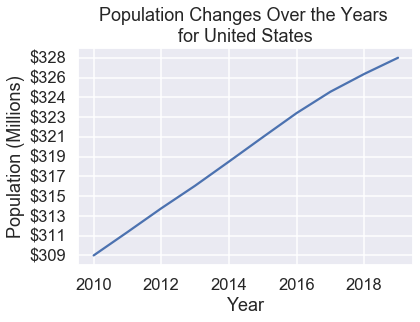


Main Menu

Please choose one of the following to investigate further: 
1. Absolute Military Spending (USD)
2. Relative Military Spending (%)
3. GDP (USD)
4. Population
q. Quit



Enter the number of your selection:  1


1 is a valid selection.

Plotting data...


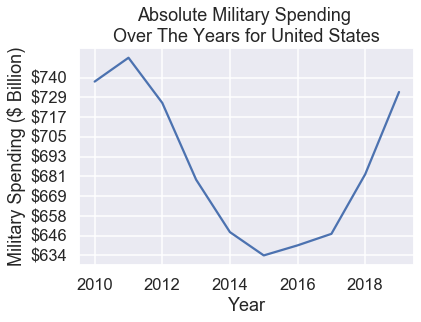


Main Menu

Please choose one of the following to investigate further: 
1. Absolute Military Spending (USD)
2. Relative Military Spending (%)
3. GDP (USD)
4. Population
q. Quit



Enter the number of your selection:  q


In [41]:
def menu():
    print()
    print('Main Menu')
    print()
    print("Please choose one of the following to investigate further: ")
    print("1. Absolute Military Spending (USD)")
    print("2. Relative Military Spending (%)")
    print("3. GDP (USD)")
    print("4. Population")
    print("q. Quit")
    print()
    
def main():
    tuple_countries = ("China", "France", "Germany", "Israel", "Italy", "Korea, Rep.", "Russian Federation", "Saudi Arabia", "United Kingdom", "United States")
    country_codes = ("CHN", "FRA", "DEU", "ISR", "ITA", "KOR", "RUS", "SAU", "GBR", "USA")
    # join country codes and tuple_countries for a more pleasing output in print
    res = "\n".join("{} {}".format(x, y) for x, y in zip(tuple_countries, country_codes))
    #start menu
    print("Welcome to the Interactive World Bank Data.")
    print("Which country would you like to investigate?")
    print("The following are currently available:\n")
    # print countries and their codes
    print(res)
    # input country
    countryName = input("\nWhich country would you like to investigate? You may write the country name or code: ")
    print("Checking validity of the selection...")
    combined = country_codes + tuple_countries
    inList = False
    # check if selection is available
    if (any(countryName in i for i in combined)):
        print(countryName, "is a valid selection.") 
        inList = True
        index = combined.index(countryName)
    else: 
        print(countryName, "is not a valid selection! Quitting program...") 
        print("Quiting program...")
        sys.exit()
    #print(index)
    if (index > len(tuple_countries)-1):
        index = index-len(tuple_countries) # have to change index to choose proper element in tuple_countries
        #print(index)
    countryName = tuple_countries[index]
    #print(countryName)
    # make dataframe that only contains the specified country's data
    df_plot = df_div_pop[df_div_pop["Country"].str.match(countryName)]
    print("The data available in this program goes back as far as the past decade.\n")
    selection = ""
    while selection != 'q':
        menu()
        selection = input("Enter the number of your selection: ")
        # allow user to quit
        if (selection == "q" or selection == "Q"):
            break
        # convert the selection into a number to check if it is valid
        selectionNum = int(selection)
        if (selectionNum > 4 or selectionNum < 1):
            print(selectionNum, "is not a valid selection! Quitting program...")
            sys.exit()
        else:
            print(selectionNum, "is a valid selection.")
            print()
            print("Plotting data...")
            selecPlot = ""
            # specify the column name in the dataframe based on selection number
            if (selectionNum == 1):
                selecPlot = "MIL.XPN.USD"
                sns.set()
                sns.set_context("talk", font_scale = 1) 
                with sns.axes_style("darkgrid"):
                    plot_Select = sns.lineplot(
                        data = df_plot, 
                        x = "Year", 
                        y = selecPlot )
                    plot_Select.set(
                        title = "Absolute Military Spending \nOver The Years for " + countryName,
                        ylabel = "Military Spending ($ Billion)", 
                        xlabel = "Year" )
                    minY = int(min(df_plot[selecPlot]))
                    maxY = int(max(df_plot[selecPlot]))
                    evenBin = (int(max(df_plot[selecPlot])) - int(min(df_plot[selecPlot])))/10
                    evenBin = int(evenBin)
                    ytic_Select = list(range(minY, maxY, evenBin))
                    ylab_Select = ["${:,.0f}".format(i/1e9) for i in ytic_Select]
                    plot_Select.set(yticks = ytic_Select, yticklabels = ylab_Select)
                pyplot.show()
                
            elif (selectionNum == 2):
                selecPlot = "MIL.XPN.%GDP"
                sns.set()
                sns.set_context("talk", font_scale = 1) 
                with sns.axes_style("darkgrid"):
                    plot_Select = sns.lineplot(
                        data = df_plot, 
                        x = "Year", 
                        y = selecPlot )
                    plot_Select.set(
                        title = "Relative Military Spending \nOver The Years for " + countryName,
                        ylabel = "Relative Military Spending (%)", 
                        xlabel = "Year" )
                pyplot.show()
                
            elif (selectionNum == 3):
                selecPlot = "GDP.USD"
                sns.set()
                sns.set_context("talk", font_scale = 1) 
                with sns.axes_style("darkgrid"):
                    plot_Select = sns.lineplot(
                        data = df_plot, 
                        x = "Year", 
                        y = selecPlot )
                    plot_Select.set(
                        title = "GDP Changes Over The Years for " + countryName,
                        ylabel = "GDP ($ Trillion)", 
                        xlabel = "Year" )
                    # change x and y labels
                    # y axis in trillions of dollars
                    minY = int(min(df_plot[selecPlot]))
                    maxY = int(max(df_plot[selecPlot]))
                    evenBin = (int(max(df_plot[selecPlot])) - int(min(df_plot[selecPlot])))/10
                    evenBin = int(evenBin)
                    ytic_Select = list(range(minY, maxY, evenBin))
                    ylab_Select = ["${:,.2f}".format(i/1e12) for i in ytic_Select]
                    plot_Select.set(yticks = ytic_Select, yticklabels = ylab_Select)
                pyplot.show()
                
            elif (selectionNum == 4):
                selecPlot = "POP.TOT"
                sns.set()
                sns.set_context("talk", font_scale = 1) 
                with sns.axes_style("darkgrid"):
                    plot_Select = sns.lineplot(
                        data = df_plot, 
                        x = "Year", 
                        y = selecPlot )
                    plot_Select.set(
                        title = "Population Changes Over the Years \nfor " + countryName,
                        ylabel = "Population (Millions)", 
                        xlabel = "Year" )
                    minY = int(min(df_plot[selecPlot]))
                    maxY = int(max(df_plot[selecPlot]))
                    evenBin = (int(max(df_plot[selecPlot])) - int(min(df_plot[selecPlot])))/10
                    evenBin = int(evenBin)
                    ytic_Select = list(range(minY, maxY, evenBin))
                    ylab_Select = ["{:,.0f}".format(i/1e6) for i in ytic_Select]
                    plot_Select.set(yticks = ytic_Select, yticklabels = ylab_Select)
                pyplot.show()

main()